## 시계열 데이터 특성 및 ETS모델 이해

<br>

> 시계열 데이터의 component
* Trends
* Seasonality
* Cyclical

> ETS 모델
* 데이터의 패턴을 더 잘 파악하기 위해서 또는 예측을 수행하기 위해 Smoothing
* Smoothing을 위해서 Error,Trend,Seasonality 요소들을 활용, 각각을 더하거나 곱하여 Smoothing
* 또한, 이것들을 가지고 시계열 데이터를 모델링 할 수 있음

> ETS Decomposition
* ETS 컴포넌트들을 시각화 하는것은 데이터의 흐름을 이해하는데 큰 도움

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### ETS modeling

* https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
* https://otexts.com/fppkr/ets-forecasting.html
* seasonal_decompose => seasonality와 trend를 구분해주는 함수
* freq 파리미터?????

> 적절한 모델을 사용하여 Trend,Seasonality,Noise을 관측

> 트렌드,계절성을 제거 후 노이즈에서 패턴을 관측하여 모델링 후 prediction시에 모델에 트렌드와 계절성을 더해주는 방식

In [2]:
#### 1. addtive model
## y_t 시점의 
# y_t = Noise(Error) + Trend + Seasonality + Level  ## 여기서 Level은 Error로

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
# 데이터 생성(노이즈가 섞인 상향데이터)
series = pd.Series([i+np.random.randint(10) for i in range(1,100)])

In [5]:
result = seasonal_decompose(series, model='additive', freq=1)
# freq => seasonal 사이클 안에 들어가는 샘플 수가 되어야함

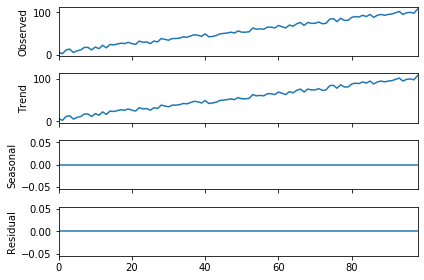

In [6]:
result.plot(); # 뒤에 ; 안붙이면 두번출력 버그

# 기존 관측치
# 기존 관측치에서의 Trend
# 기존 관측치에서의 계절성
# 기존 관측치에서의 Noise

In [7]:
# decompose

def plot_decompose(decomposeresult):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observed')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('resid')

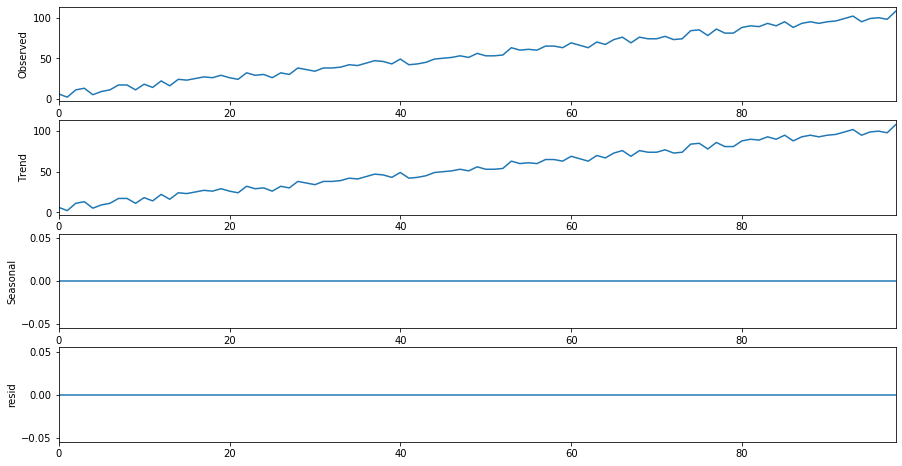

In [8]:
plot_decompose(result)

In [9]:
#### 2. multiplicative
## exponential(지수)
## y_t 시점의 
# y_t = Noise(Error) * Trend * Seasonality * Level

# log를 씌워주면,
# => log(y_t) = Level + Error + Trend + Seasonality

In [10]:
series = pd.Series([i**2 for i in range(1,100)])

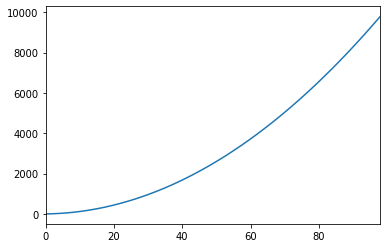

In [11]:
series.plot()

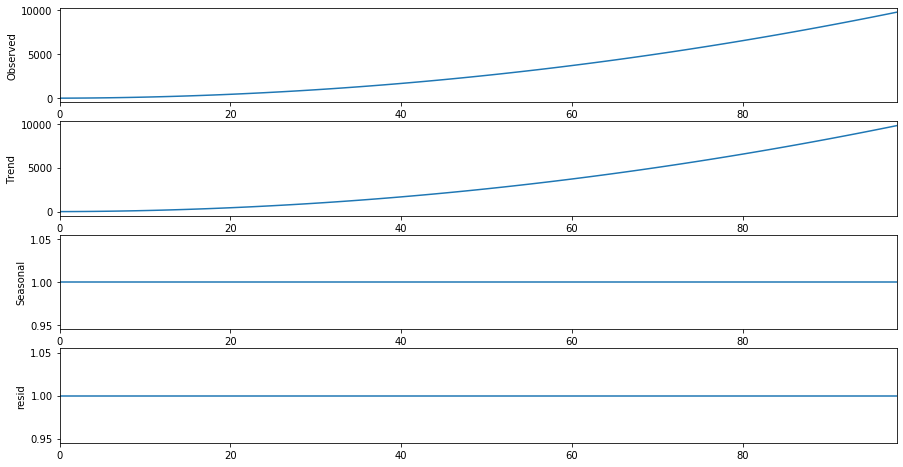

In [12]:
result = seasonal_decompose(series, model='multiplicative', freq=1)
plot_decompose(result)

In [13]:
airline = pd.read_csv('./data/airline_passengers.csv', index_col='Month')
airline.index = pd.to_datetime(airline.index)

In [14]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


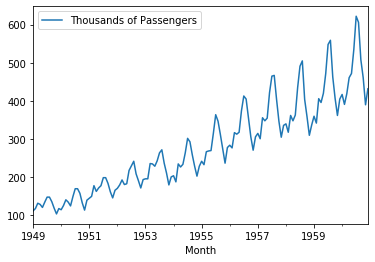

In [15]:
airline.plot()

* 이 경우 addtive모델 혹은 multiplitcative 중 어떤 모델로 decompose해야하는가

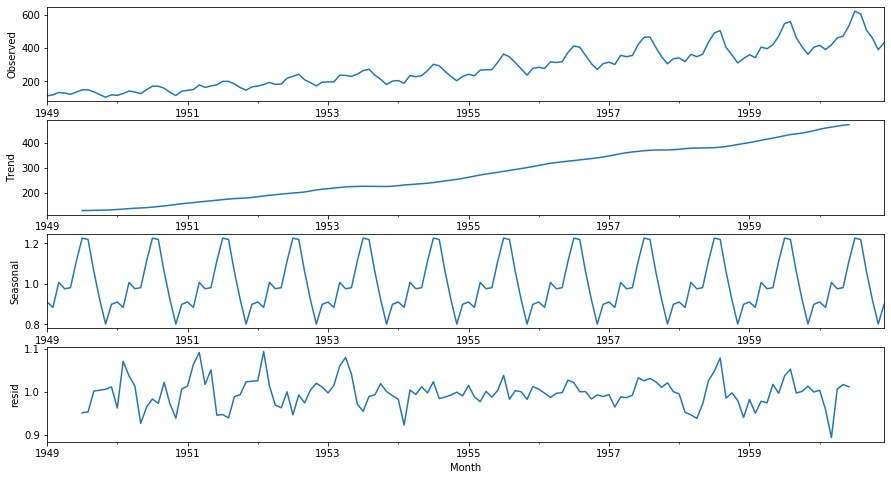

In [16]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
plot_decompose(result)